In [36]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Libreria para estimar regresión
import statsmodels.formula.api as sm

# Libreria para normalizar
from sklearn.preprocessing import StandardScaler

**OBJETIVO**

Predecir la probabilidad de que una persona padezca un problema cardíaco en base a su estado de salud en general, diferenciando si es hombre o mujer 

**CONTEXTO PROFESIONAL**

El área de Cardiología de la Clínica Pergamino se encuentra analizando, a partir de historias médicas de distintos pacientes que fueron atendidos en los consultorios, qué tan probable puede ser que haya muchos pacientes potenciales a sufrir problemas de corazón. 


**PROBLEMÁTICA DEL ÁREA**

Para poder estar lo mejor preparados e invertir en tecnologías que ayuden a intervenir a pacientes con problemas cardiovasculares, es necesario obtener la probabilidad de que existan potenciales personas riesgosas a tener dicha afección. 

**CONTEXTO ANALÍTICO**

Se cuenta con la siguiente información: 
    
* Salud_general
* Último control realizado
* Ejercicio
* Enfermedad del corazón preexistente
* Cáncer de piel
* Otro cáncer
* Depresión
* Diabetes
* Artritis
* Sexo
* Categoría de edad
* Altura (cm)
* Peso (kg)
* IMC
* Historial de tabaquismo
* Consumo de alcohol
* Consumo de frutas
* Consumo de verduras verdes
* Consumo de papas fritas

# Paso 1: Carga del data frame y primera exploración

In [37]:
# Carga del dataset
df = pd.read_csv('CVD_cleaned.csv')

df = pd.read_csv('CVD_cleaned.csv', sep = ',')



In [38]:
# Mostrar las primeras filas del dataframe
print(df.head())



  General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height_(cm)  Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  \
0        150.0        32.66  

In [39]:
# Obtener información básica del dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [40]:
# Estadísticas descriptivas
print(df.describe())

         Height_(cm)    Weight_(kg)            BMI  Alcohol_Consumption  \
count  308854.000000  308854.000000  308854.000000        308854.000000   
mean      170.615249      83.588655      28.626211             5.096366   
std        10.658026      21.343210       6.522323             8.199763   
min        91.000000      24.950000      12.020000             0.000000   
25%       163.000000      68.040000      24.210000             0.000000   
50%       170.000000      81.650000      27.440000             1.000000   
75%       178.000000      95.250000      31.850000             6.000000   
max       241.000000     293.020000      99.330000            30.000000   

       Fruit_Consumption  Green_Vegetables_Consumption  \
count      308854.000000                 308854.000000   
mean           29.835200                     15.110441   
std            24.875735                     14.926238   
min             0.000000                      0.000000   
25%            12.000000          

In [41]:
# Comprobar valores faltantes
print(df.isnull().sum())

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64


# Paso 2: Preprocesamiento de Datos

Limpieza de Datos: Chequear valores faltantes y posibles errores en los datos.

In [42]:
# Eliminar o imputar valores faltantes

df = df.dropna() 

In [51]:
# Reemplazar "Yes" con 1 y "No" con 0 en las columnas especificadas
columns_to_convert = ['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis']

# Reemplazar "Yes" por 1 y "No" por 0
df[columns_to_convert] = df[columns_to_convert].replace({'Yes': 1, 'No': 0})

# Verificar los cambios
print(df.head())

  General_Health                  Checkup  Exercise  Heart_Disease  \
0           Poor  Within the past 2 years         0              0   
1      Very Good     Within the past year         0              1   
2      Very Good     Within the past year         1              0   
3           Poor     Within the past year         1              1   
4           Good     Within the past year         0              0   

   Skin_Cancer  Other_Cancer  Depression Diabetes  Arthritis     Sex  \
0            0             0           0        0          1  Female   
1            0             0           0        1          0  Female   
2            0             0           0        1          0  Female   
3            0             0           0        1          0    Male   
4            0             0           0        0          0    Male   

  Age_Category  Height_(cm)  Weight_(kg)    BMI Smoking_History  \
0        70-74        150.0        32.66  14.54             Yes   
1        70-

In [44]:
# Seleccionar características y variable objetivo
X = df[['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer',
        'Depression', 'Diabetes', 'Arthritis', 'Height_(cm)', 'Weight_(kg)', 
        'BMI', 'Smoking_History','Alcohol_Consumption', 'Fruit_Consumption', 
        'Green_Vegetables_Consumption', 'FriedPotato_Consumption','Sex', 'Age_Category']]

y = df['Heart_Disease']

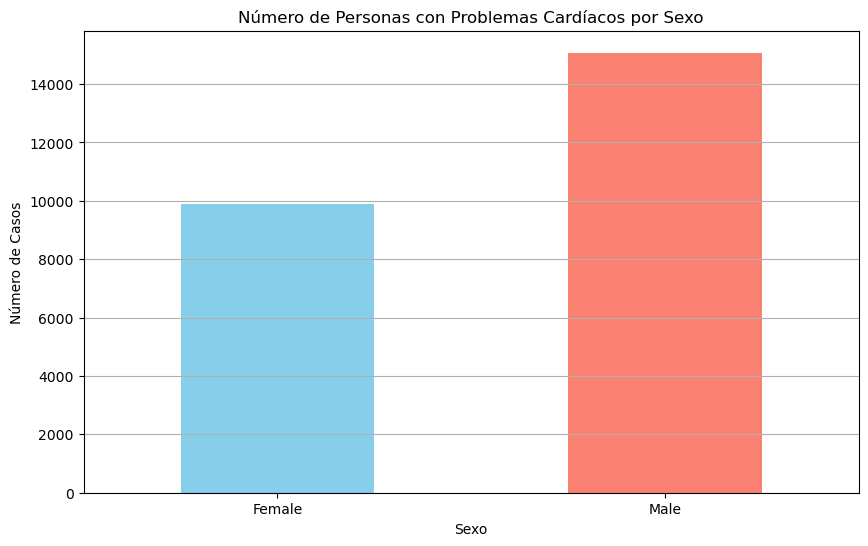

In [52]:
# Contar el número de casos de enfermedad cardíaca por sexo
sex_heart_disease_counts = df.groupby('Sex')['Heart_Disease'].sum()

plt.figure(figsize=(10, 6))
sex_heart_disease_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Número de Personas con Problemas Cardíacos por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Casos')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [57]:
# Contar el número de casos con problemas cardíacos (Heart_Disease == 1) por sexo
heart_disease_counts = df[df['Heart_Disease'] == 1].groupby('Sex').size()

# Contar el número de casos sin problemas cardíacos (Heart_Disease == 0) por sexo
no_heart_disease_counts = df[df['Heart_Disease'] == 0].groupby('Sex').size()

# Mostrar los resultados
print("Número de personas con problemas cardíacos por sexo:")
print(heart_disease_counts)
print("\nNúmero de personas sin problemas cardíacos por sexo:")
print(no_heart_disease_counts)

Número de personas con problemas cardíacos por sexo:
Sex
Female     9898
Male      15073
dtype: int64

Número de personas sin problemas cardíacos por sexo:
Sex
Female    150298
Male      133585
dtype: int64


<Figure size 1200x800 with 0 Axes>

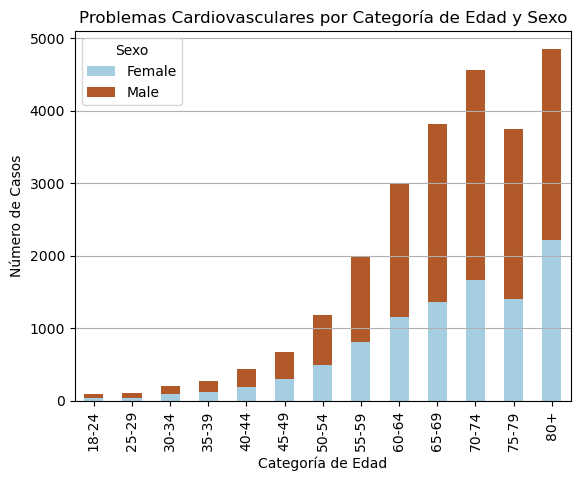

In [53]:
# Conteo de casos de enfermedad cardíaca por categoría de edad y sexo
age_sex_heart_disease_counts = df[df['Heart_Disease'] == 1].groupby(['Age_Category', 'Sex']).size().unstack()

plt.figure(figsize=(12, 8))
age_sex_heart_disease_counts.plot(kind='bar', stacked=True, colormap='Paired')
plt.title('Problemas Cardiovasculares por Categoría de Edad y Sexo')
plt.xlabel('Categoría de Edad')
plt.ylabel('Número de Casos')
plt.legend(title='Sexo')
plt.grid(axis='y')
plt.show()

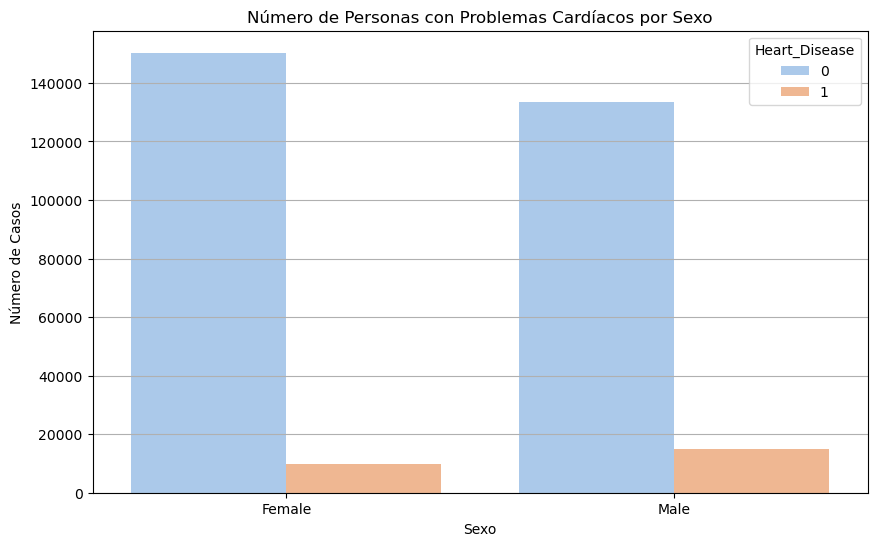

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Heart_Disease', data=df, palette='pastel')
plt.title('Número de Personas con Problemas Cardíacos por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Casos')
plt.grid(axis='y')
plt.show()

**Primera Conclusión**

El análisis de los gráficos generados a partir del DataFrame revela que la incidencia de problemas cardíacos es notablemente más alta en el sexo masculino. En particular, se observa que esta incidencia aumenta de manera significativa en los rangos de edad a partir de los 60 años. A medida que se avanza en la edad, la frecuencia de problemas cardíacos se eleva progresivamente, indicando una mayor vulnerabilidad a estos problemas en los hombres de edad avanzada.

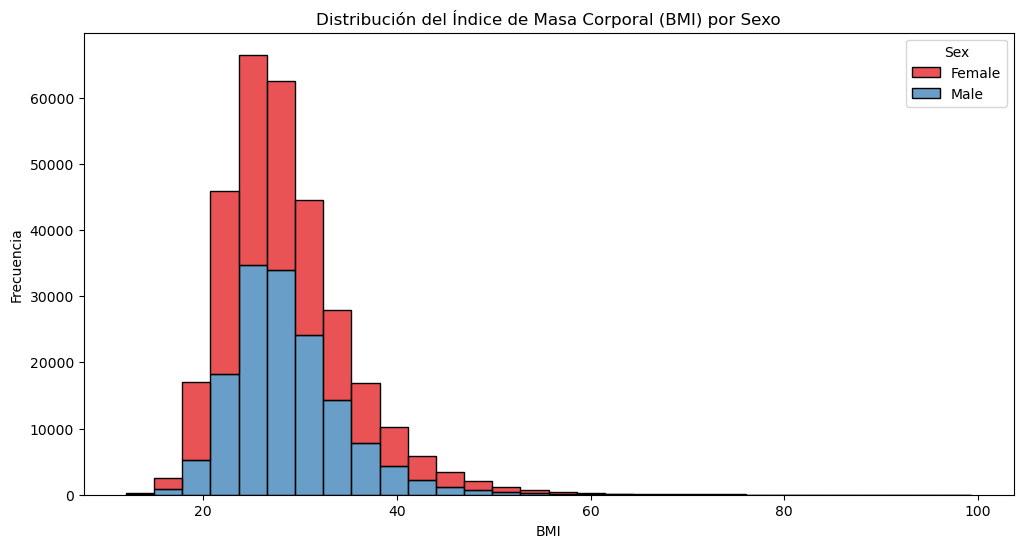

In [63]:
# Distribución del Índice de Masa Corporal (BMI) para hombres y mujeres, diferenciando si tienen problemas cardíacos o no.


plt.figure(figsize=(12, 6))
sns.histplot(df, x='BMI', hue='Sex', multiple='stack', bins=30, palette='Set1')
plt.title('Distribución del Índice de Masa Corporal (BMI) por Sexo')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\adric\AppData\Local\Temp\ipykernel_17092\3578638158.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart_Disease', y='Green_Vegetables_Consumption', data=df, palette='coolwarm')


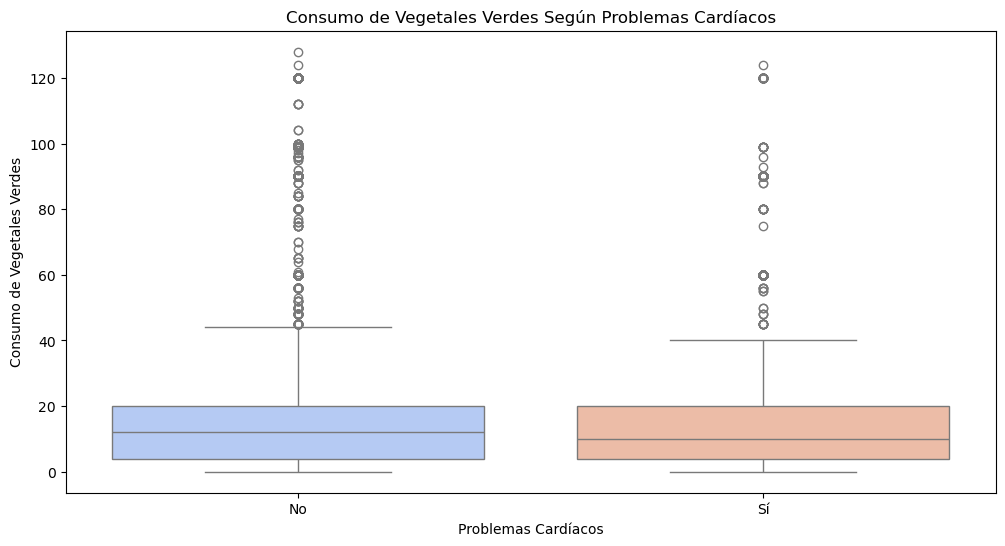

In [64]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Heart_Disease', y='Green_Vegetables_Consumption', data=df, palette='coolwarm')
plt.title('Consumo de Vegetales Verdes Según Problemas Cardíacos')
plt.xlabel('Problemas Cardíacos')
plt.ylabel('Consumo de Vegetales Verdes')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

c:\Users\adric\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\adric\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\adric\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\adric\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


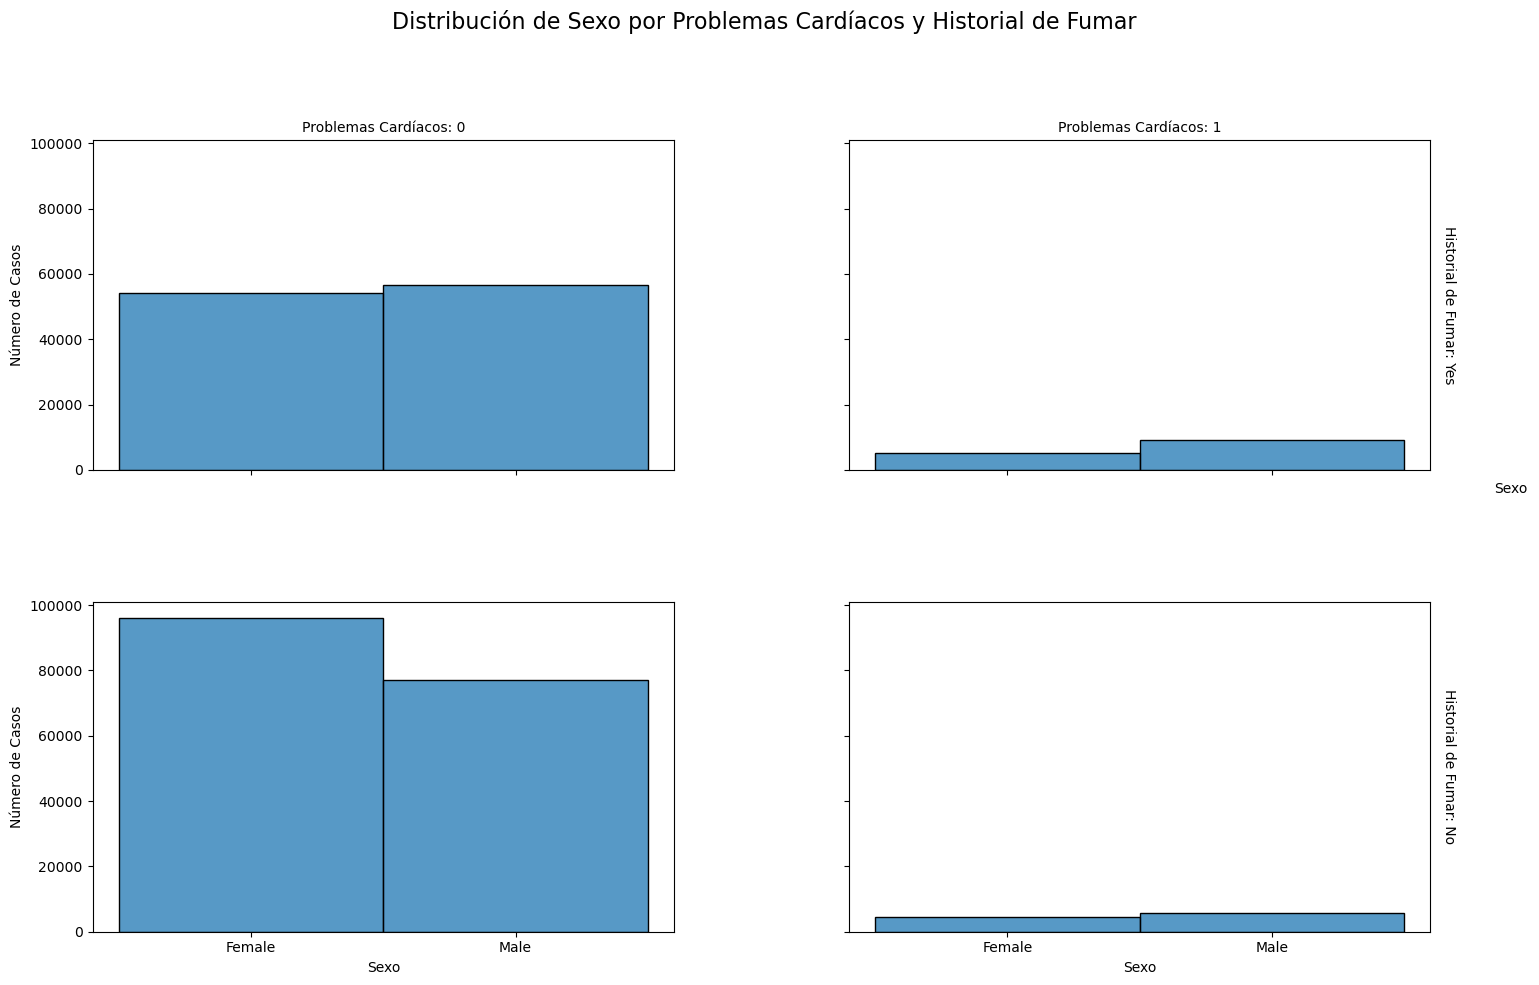

In [90]:
# Crear el FacetGrid con filas para 'Smoking_History' y columnas para 'Heart_Disease'
g = sns.FacetGrid(df, col='Heart_Disease', row='Smoking_History', margin_titles=True,
                  height=5, aspect=1.5, despine=False, sharex=True, sharey=True)

# Mapear histogramas de la variable 'Sex'
g.map(sns.histplot, 'Sex', discrete=True, bins=2, palette='coolwarm')

# Ajustar títulos y etiquetas
g.set_axis_labels('Sexo', 'Número de Casos')
g.set_titles(col_template="Problemas Cardíacos: {col_name}", row_template="Historial de Fumar: {row_name}")
g.add_legend(title='Sexo')

# Ajustar los márgenes para evitar la superposición
plt.subplots_adjust(top=0.85, hspace=0.4, wspace=0.3)  

# Ajustar el título general
g.fig.suptitle('Distribución de Sexo por Problemas Cardíacos y Historial de Fumar', fontsize=16)

plt.show()

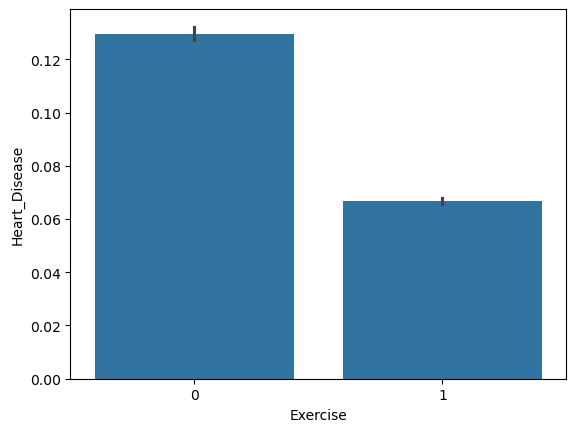

In [88]:
plt.figure()
sns.barplot(data = df, 
            x='Exercise',
            y='Heart_Disease')
plt.show()

**Segunda Conclusión**

El análisis de los gráficos revela que, aunque inicialmente observamos que la incidencia de problemas cardíacos es significativamente mayor en los hombres, esta no muestra una relación directa con el historial de tabaquismo, tanto en hombres como en mujeres. Sin embargo, se identifica una relación clara con la práctica de ejercicio físico. Los datos muestran que los problemas cardíacos aumentan de manera exponencial en las personas que no realizan ejercicio, siendo casi el doble de frecuentes en comparación con aquellos que llevan una rutina de actividad física regular.